# [Import Libraries](#Import_Libraries)

# [ANN for Regression](#ANN_for_Regression)
> ## [Data](#data_regression)
>> ### [Import data](#import_data_regression)
>> ### [Create data](#create_data_regression)
> ## [Models](#models_regression)
>> ### [Simple](#Simple_Model_regression)
>> ### [Function](#Function_Model_regression)
>> ### [Class](#Class_Models_regression)
> ## [Plotting](#plotting_regression)
>> ### [Show the losses](#losses_regression)

# [ANN for Classification](#ANN_for_classification)
> ## [Data](#data_classification)
>> ### [Import data](#import_data_classification)
>> ### [Create data](#create_data_classification)
> ## [Models](#models_classification)
>> ### [Simple](#simple_model_classification)
>> ### [Function](#Function_Model_classification)
>> ### [Class 1](#Class1_Models_classification)
>> ### [Class 2](#Class2_Models_classification)
> ## [Plotting](#plotting_classification)
>> ### [Show the losses](#losses_classification)

<a id='Import_Libraries'></a>
# Import Libraries

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

<a id='ANN_for_Regression'></a>
# ANN for Regression

## Data

### Import Data (Regression)

<a id='Create_data_regression'></a>

### Create data (regression):

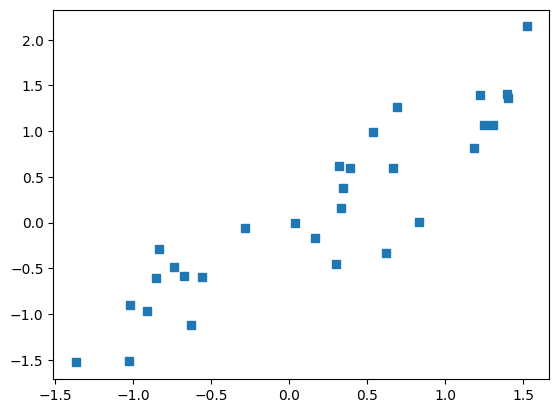

In [4]:
# create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

<a id='models_regression'></a>
## models (regression)

__nn.Sequential__: a container module allowing to stack layers of a neural network in a sequential manner.

__nn.Linear(in_features, out_features)__: a linear (fully connected) layer 

__nn.ReLU()__: Adding a Rectified Linear Unit (ReLU) activation function: f(x) = max(0, x), which introduces non-linearity to the model.
The ReLU is commonly used because it helps to mitigate the vanishing gradient problem and allows models to learn faster.

<a id='Simple_Model_regression'></a>
### Simple Model, adding layers
#### (Regression):

In [5]:
ANNreg = nn.Sequential(
    nn.Linear(1, 1),  # input layer
    nn.ReLU(),        # activation function
    nn.Linear(1, 1)   # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

### Simple Model, hyper parameters
#### (Regression):

In [4]:
learningRate = .05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
# This is the flavor(type) of gradient descent to implement
# SGD: stochastic gradient descent

### Simple Model, training
#### (Regression):

In [5]:
numepochs = 500
losses = torch.zeros(numepochs)
## Train the model!
for epochi in range(numepochs):
    # forward pass: yHat is the final prediction of the model
    # It has a shape of: (30, 1) 
    yHat = ANNreg(x)

    # compute loss (squared error of actual and predicted)
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad() # Clears the gradients of all optimized parameters
    loss.backward() # Computes the gradient of the loss with respect to the model parameters
    optimizer.step() # Updates the model parameters based on the computed gradients
    
# manually compute losses
# final forward pass (one more!)
predictions = ANNreg(x)

### Model with Functions (regression)

### Model with Class (Regression):

In [2]:
class ANNiris(nn.Module):
  def __init__(self,nUnits,nLayers):
    super().__init__()

    # create dictionary to store the layers
    self.layers = nn.ModuleDict() #an empty dict, a special one specifically for string layers
    self.nLayers = nLayers#nUnits

    ### input layer
    self.layers['input'] = nn.Linear(4,nUnits)

    ### hidden layers
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

    ### output layer
    self.layers['output'] = nn.Linear(nUnits,3)


  # forward pass
  def forward(self,x):
    # input layer (note: the code in the video omits the relu after this layer)
    x = F.relu( self.layers['input'](x) )

    # hidden layers
    for i in range(self.nLayers):
      x = F.relu( self.layers[f'hidden{i}'](x) )

    # return output layer
    x = self.layers['output'](x)
    return x

In [3]:
### class
# generate an instance of the model and inspect it
nUnitsPerLayer = 5
nLayers = 2
net = ANNiris(nUnitsPerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=5, bias=True)
    (hidden0): Linear(in_features=5, out_features=5, bias=True)
    (hidden1): Linear(in_features=5, out_features=5, bias=True)
    (output): Linear(in_features=5, out_features=3, bias=True)
  )
)

## Show the losses:
####  (common for all three approach)

In [17]:
# manually compute losses
# final forward pass (one more!)
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() # so this is actually cost as we get the mean for all

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

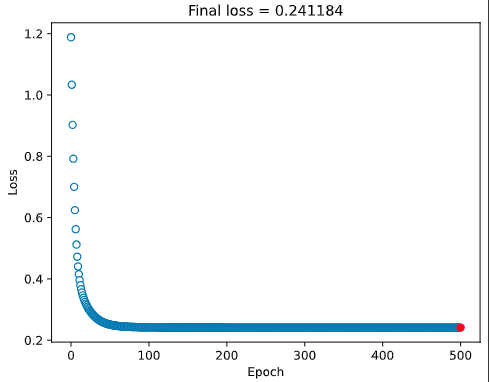

In [18]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()
# If you ended up with a horizontal line, try to increase # of epochs

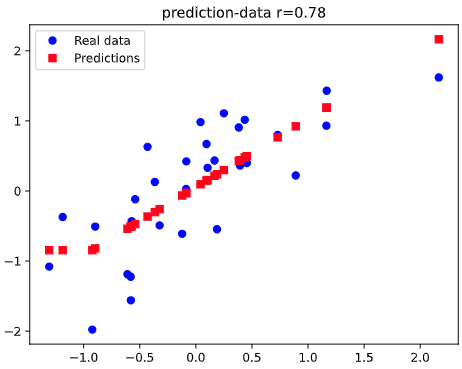

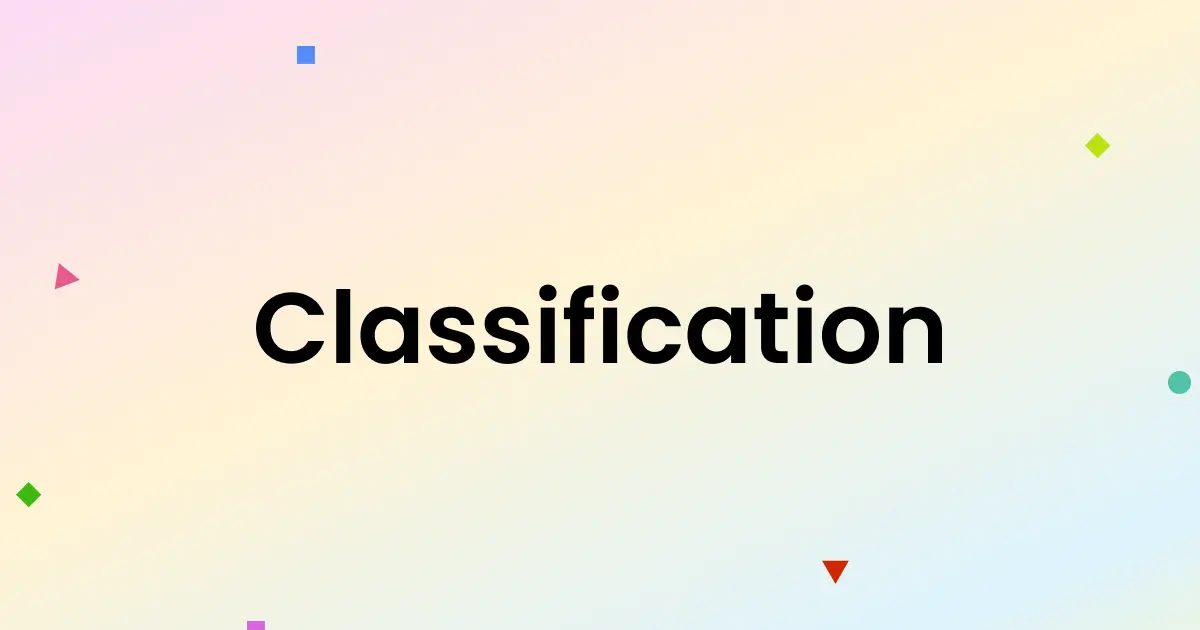

<a id='ANN_for_classification'></a>
## ANN for Classification

<a id='data_classification'></a>
## Data

<a id='import_data_classification'></a>\
### Import data:

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()
# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

<a id='create_data_classification'></a>\
### Create data:

In [107]:
nPerClust = 100
blur = 1

# Centers:
A = [  1, 1 ]
B = [  5, 1 ]

# 100 points for each group: (two lists, each with len = 2)
# [array([ .., .., .., ...]), array([ .., .., .., ...])
# a = [aaa1, aaa2], b = [bbb1, bbb2]
a = [ A[0]+np.random.randn(nPerClust)*blur ,
     A[1]+np.random.randn(nPerClust)*blur
    ]

b = [ B[0]+np.random.randn(nPerClust)*blur ,
     B[1]+np.random.randn(nPerClust)*blur
    ]

# true labels (column vector (200,1):
#                100 zeros, following by 100 ones)
labels_np = np.vstack(
    (np.zeros((nPerClust,1)),np.ones((nPerClust,1)))
)

# concatanate into a matrix (200, 2)
# [a1 a2
# a1  a2
# a1  a2
# b1  b2
# b1  b2
# b1  b2]
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor (with dtype float32)
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

### Show data:

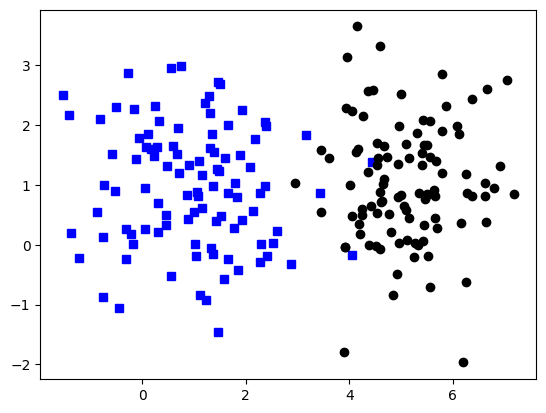

In [108]:
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.show()

<a id='models_classification'></a>
## Models (Classification)

<a id='simple_model_classification'></a>
### Simple Model, adding layers
#### (Classification)

In [121]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer (Now we give it two features: x,y)
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

### Simple Model, hyper parameters
#### (Classification):

In [122]:
# other model features
learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss,
# and remove the final nn.Sigmoid(), but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

### Simple Model, training
#### (Classification):

In [123]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



#### Predictions, losses, accuracy

In [ ]:
# final forward pass
predictions = ANNclassify(data)
#####################################
# We already have losses
print(f'Losses: {losses}')
#####################################
predlabels = predictions>.5
# find errors
misclassified = np.where(predlabels != labels)[0]
# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

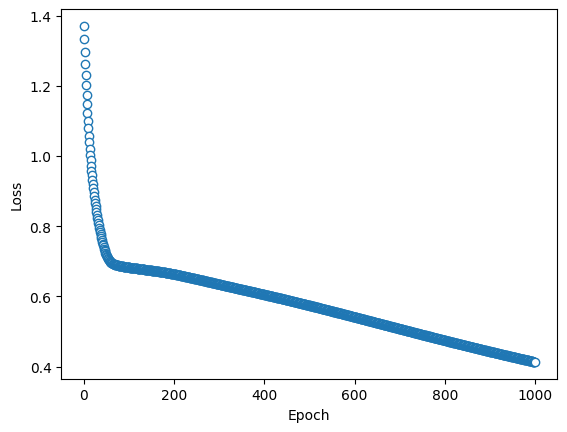

In [124]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Final accuracy: 94%


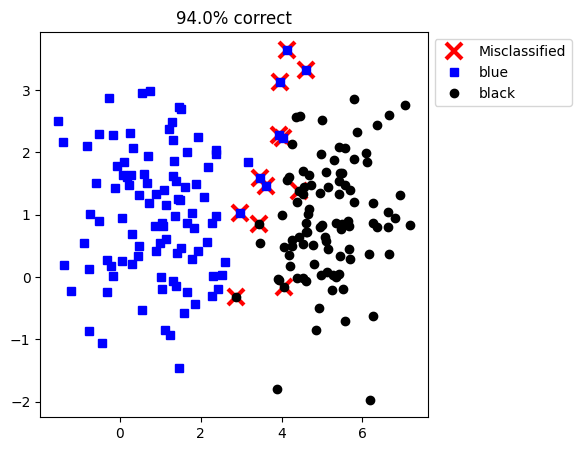

In [126]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

<a id='Function_Model_classification'></a>
### Function Model, adding layers + hyper parameters
#### (Classification)

In [ ]:
def createANNmodel(learningRate):

    ANNclassify = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )

    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

    return ANNclassify,lossfun,optimizer

### Function Model, training func
#### (Classification)

In [ ]:
numepochs = 1000

def trainTheModel(ANNmodel):

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):
        yHat = ANNmodel(data) ### We have data in global space
        loss = lossfun(yHat,labels) ### We have data in global space
        losses[epochi] = loss

        optimizer.zero_grad() ### We have data in global space
        loss.backward()
        optimizer.step()
        
    # final forward pass
    predictions = ANNmodel(data)
    totalacc = 100*torch.mean(((predictions>0) == labels).float())
    ### We have labels in global space
    
    return losses,predictions,totalacc

### Function Model, running func
#### (Classification)

In [ ]:
ANNclassify,lossfun,optimizer = createANNmodel(.01)
losses,predictions,totalacc = trainTheModel(ANNclassify)

#### Predictions, losses, accuracy
Look above!

### Test: varying learning rate

In [8]:
##### ...........#############

<a id='Class1_Models_classification'></a>
## Class Model, adding layers
### (class 1)

In [ ]:
class theClass4ANN(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(2,1)
    
    ### output layer
    self.output = nn.Linear(1,1)

  # forward pass
  def forward(self,x):

    # pass through the input layer
    x = self.input(x)

    # apply relu
    x = F.relu( x ) # This is easier than: nn.Relu()

    # output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x

ANNclassify = theClass4ANN()

### Class Model, Hyper parameters (simple)
#### (Classification)

In [ ]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use 
# BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

### Class Model, Training (simple)
#### (Classification)

In [ ]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Predictions, losses, accuracy

In [ ]:
# final forward pass
predictions = ANNclassify(data)
######################################
# We already have losses
print(f'Losses: {losses}')
#####################################
predlabels = predictions>.5
# find errors
misclassified = np.where(predlabels != labels)[0]
# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

<a id='Class2_Models_classification'></a>
## Class Model, adding layers, forward
### (class 2)

In [ ]:
class ANNiris(nn.Module):
    def __init__(self,nUnits,nLayers):
        super().__init__()

        # create dictionary to store the layers
        self.layers = nn.ModuleDict() #an empty dict, a special one specifically for string layers
        self.nLayers = nLayers#nUnits

        ### input layer
        self.layers['input'] = nn.Linear(4,nUnits)

        ### hidden layers
        for i in range(nLayers):
          self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

        ### output layer
        self.layers['output'] = nn.Linear(nUnits,3)


    # forward pass
    def forward(self,x):
        # input layer (note: the code in the video omits the relu after this layer)
        x = F.relu( self.layers['input'](x) )

        # hidden layers
        for i in range(self.nLayers):
          x = F.relu( self.layers[f'hidden{i}'](x) )

        # return output layer
        x = self.layers['output'](x)
        return x

nUnitsPerLayer = 5
nLayers = 2
net = ANNiris(nUnitsPerLayer,nLayers)

### A quick test

In [ ]:
tmpx = torch.randn(10,4)
y = net(tmpx)
print(y)

## Class Model, hyper parameter + train, function
### (Classification)

In [ ]:
def trainTheModel(theModel):

    # define the loss function and optimizer
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(theModel.parameters(),lr=.01)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = theModel(data)

        # compute loss
        loss = lossfun(yHat,labels)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    # final forward pass to get accuracy
    predictions = theModel(data)
    predlabels = torch.argmax(predictions,axis=1)
    acc = 100*torch.mean((predlabels == labels).float())

    # total number of trainable parameters in the model
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    # function outputs
    return acc,nParams

### Running the trining (the function)
#### (Classification)

In [ ]:
numepochs = 2500
acc = trainTheModel(net)

# check the outputs
acc # tuple containing (accuracy,nparams)

### Predictions, losses, accuracy

You have accuracy as the output of the running function,<br>
You can also edit the function to output the prediction,<br>
And edit that same function to save and then output the losses.

### Exp:

In [ ]:
###### ............ #############

Summary:

You should have the layer part, hyper parameters, and training in a loop.
Now, you could use either sequential or the class (layer+forward+an instance) for the layer part.
Also, you could have it in a function.

And for the hyper parameter, you could have them in global space, or if you include the layer part in a function, you could have hypers in that function too.

Finally, for the training, again you can have it in global, or include it in a function. If you have the layers in a class in global, you need to include the hypers in this function. but if you already have your layer class in a function, you could have the hypers in that function and in your training func, you include only the training part.

#### To avoid the global space problem, you can use the following version:

In [ ]:
class ANNiris(nn.Module): # Moved outside the function
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input = nn.Linear(input_size, hidden_size)
        self.hidden = nn.Linear(hidden_size, output_size)
        self.output = nn.Linear(output_size, 1)

    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

def train_model(model, data, labels, learning_rate, num_epochs): #Moved outside the function and take arguments
    loss_func = nn.BCEWithLogitsLoss()  # Loss function is now local
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Optimizer is now local

    losses = torch.zeros(num_epochs)

    for epoch_i in range(num_epochs):
        y_hat = model(data)
        loss = loss_func(y_hat, labels)
        losses[epoch_i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = model(data)
    total_acc = 100 * torch.mean(((predictions > 0.5) == labels).float())

    return losses, predictions, total_acc

# Example usage:
input_size = 2
hidden_size = 16
output_size = 1
learning_rate = 0.01
num_epochs = 1000
data = torch.randn(100,2) #Sample data
labels = torch.randint(0,2,(100,1)).float() #Sample labels

model = ANNiris(input_size, hidden_size, output_size)
losses, predictions, total_acc = train_model(model, data, labels, learning_rate, num_epochs)

print(f"Final accuracy: {total_acc:.2f}%")